# Data Analysis Project:
## Analyzing the Latin American countries GDP over the 2000 - 2018 period

In [1]:
# Importing the libraries to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from ipywidgets import interact
import ipywidgets as widgets
import matplotx

In [2]:
# Checking the version of each library to ensure they are correct

print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('matplot:', mpl.__version__)
print('seaborn:', sns.__version__)

numpy: 2.2.6
pandas: 2.2.3
matplot: 3.10.3
seaborn: 0.13.2


In [3]:
# Loading the dataset from a csv file, and checking the shape of the original df.
# This dataset contains information about the GDP for each country in the world over the 1990 - 2019 period. 
# Gross Domestic Product (GDP) is the monetary value of all finished goods and services made within a country during a specific period. 
# GDP provides an economic snapshot of a country, used to estimate the size of an economy and growth rate. 
# This dataset contains the GDP based on Purchasing Power Parity (PPP).

df = pd.read_csv(r"..\data\GDP.csv")
df.shape

(260, 32)

In [4]:
# To check the datatypes in the df

df.dtypes

Country          object
Country Code     object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
dtype: object

In [5]:
df.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [6]:
# Checking the percentage of missing data in each column of the df. The period from 1990 to 1999 has over 10 % of missing data

(df.isnull().sum() / len(df)) * 100

Country           0.000000
Country Code      0.000000
1990             19.615385
1991             18.846154
1992             18.076923
1993             17.307692
1994             16.153846
1995             13.846154
1996             13.846154
1997             13.461538
1998             13.076923
1999             12.692308
2000              9.230769
2001              8.846154
2002              8.461538
2003              8.461538
2004              8.461538
2005              8.461538
2006              8.461538
2007              8.076923
2008              7.692308
2009              7.307692
2010              7.307692
2011              6.538462
2012              7.307692
2013              7.307692
2014              7.692308
2015              8.461538
2016              8.461538
2017              8.461538
2018             11.153846
2019            100.000000
dtype: float64

In [7]:
df = df.drop('2019', axis = 'columns')
df = df.drop('Country Code', axis = 'columns')

In [8]:
# Checking the columns of the df. Since there are so many missing values in the 1990 - 1999 span, I will drop these columns and only keep the period between 2000 and 2018 (the 2019 column only has missing values)

df.columns

Index(['Country ', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')

In [9]:
# Creating a list of the columns that I wish to keep
columns = list(range(11, 30))
columns.insert(0, 0)
columns

[0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [10]:
# Filtering the data

df = df.iloc[:, columns]
df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN
1,Afghanistan,NaN,NaN,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208
2,Angola,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165
3,Albania,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400
4,Arab World,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600


In [11]:
# Cleaning the column names (there was a whitespace at the end of the 'Country' column)

df.columns = [i.strip() for i in df.columns]

In [12]:
# Creating a function to filter the Latin countries that I wish to keep from the orginal df

def latin(x):
    countries = ['Argentina', 'Brazil', 'Bolivia', 'Peru', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Ecuador']
    for i in countries:
            if i == x:
                return "Latin"
    return "Nonlatin"

df['Continent'] = df['Country'].apply(lambda x: latin(x))  # Creates a new column in the df named 'Continent'. I will use this column to apply a boolean mask over the df


In [13]:
# Filtering the df with a boolean mask based on the column created

df = df[df['Continent'] == 'Latin']

In [14]:
# Cleaning the df

df = df.round(2)
df = df.drop('Continent', axis = 'columns')
df

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Argentina,11916.58,11514.62,10310.13,11307.76,12527.80,13916.53,15334.94,16994.70,17850.13,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
24,Bolivia,3478.20,3546.12,3623.09,3721.06,3909.07,4134.62,4386.57,4629.68,4925.92,5045.33,5228.12,5524.72,5825.14,6231.30,6593.23,6882.49,7147.84,7480.08,7873.17
25,Brazil,9073.98,9274.25,9581.99,9747.94,10460.55,11004.96,11659.39,12568.20,13332.14,13288.44,14320.37,15061.95,15506.55,16111.44,16358.39,15813.86,15331.55,15662.24,16096.40
34,Chile,9553.57,9972.65,10333.06,10841.32,11812.64,12746.58,15753.96,16941.84,16501.81,16159.61,18161.80,20342.57,21507.71,22439.28,22786.66,22688.01,22874.15,24248.86,25222.53
40,Colombia,6694.81,6848.28,7022.74,7324.40,7811.23,8320.57,9036.31,9792.90,10188.02,10274.49,10732.75,11650.20,12226.29,12891.38,13618.12,14006.15,14259.61,14507.26,15012.93
60,Ecuador,5854.34,6110.46,6348.92,6530.52,7135.99,7619.03,8059.13,8316.57,8868.94,8841.98,9114.34,9883.58,10483.13,11028.43,11484.17,11431.99,11222.08,11501.01,11734.39
180,Peru,5115.13,5193.02,5500.92,5778.61,6171.60,6705.09,7365.74,8140.98,8984.08,9078.56,9869.07,10626.08,11400.34,12169.12,12561.25,12944.82,13403.45,13771.46,14418.07
189,Paraguay,6353.24,6313.62,6292.12,6565.98,6896.88,7146.77,7600.70,8111.14,8674.90,8601.54,9541.37,10016.77,10015.49,10898.45,11486.94,11807.77,12287.99,12971.68,13599.93
244,Uruguay,10249.74,10054.53,9422.25,9681.42,10446.47,11574.32,12399.89,13540.07,14756.48,15456.18,16808.28,17993.45,18930.97,20094.29,21069.23,21300.98,21820.26,22728.13,23572.18


In [15]:
df.reset_index(inplace = True)

In [16]:
df.drop('index', axis = 'columns', inplace = True)

In [17]:
df

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,11916.58,11514.62,10310.13,11307.76,12527.80,13916.53,15334.94,16994.70,17850.13,16753.39,18524.86,19817.45,19764.23,20365.61,20008.32,20551.83,20130.41,20843.16,20610.57
1,Bolivia,3478.20,3546.12,3623.09,3721.06,3909.07,4134.62,4386.57,4629.68,4925.92,5045.33,5228.12,5524.72,5825.14,6231.30,6593.23,6882.49,7147.84,7480.08,7873.17
2,Brazil,9073.98,9274.25,9581.99,9747.94,10460.55,11004.96,11659.39,12568.20,13332.14,13288.44,14320.37,15061.95,15506.55,16111.44,16358.39,15813.86,15331.55,15662.24,16096.40
3,Chile,9553.57,9972.65,10333.06,10841.32,11812.64,12746.58,15753.96,16941.84,16501.81,16159.61,18161.80,20342.57,21507.71,22439.28,22786.66,22688.01,22874.15,24248.86,25222.53
4,Colombia,6694.81,6848.28,7022.74,7324.40,7811.23,8320.57,9036.31,9792.90,10188.02,10274.49,10732.75,11650.20,12226.29,12891.38,13618.12,14006.15,14259.61,14507.26,15012.93
5,Ecuador,5854.34,6110.46,6348.92,6530.52,7135.99,7619.03,8059.13,8316.57,8868.94,8841.98,9114.34,9883.58,10483.13,11028.43,11484.17,11431.99,11222.08,11501.01,11734.39
6,Peru,5115.13,5193.02,5500.92,5778.61,6171.60,6705.09,7365.74,8140.98,8984.08,9078.56,9869.07,10626.08,11400.34,12169.12,12561.25,12944.82,13403.45,13771.46,14418.07
7,Paraguay,6353.24,6313.62,6292.12,6565.98,6896.88,7146.77,7600.70,8111.14,8674.90,8601.54,9541.37,10016.77,10015.49,10898.45,11486.94,11807.77,12287.99,12971.68,13599.93
8,Uruguay,10249.74,10054.53,9422.25,9681.42,10446.47,11574.32,12399.89,13540.07,14756.48,15456.18,16808.28,17993.45,18930.97,20094.29,21069.23,21300.98,21820.26,22728.13,23572.18


In [18]:
# Lookig for null values

df.isnull().sum()

Country    0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64

In [19]:
# Transposing the df to plot the evolution of the GDP for each country across the years

df = df.transpose()

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8
Country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Peru,Paraguay,Uruguay
2000,11916.58,3478.2,9073.98,9553.57,6694.81,5854.34,5115.13,6353.24,10249.74
2001,11514.62,3546.12,9274.25,9972.65,6848.28,6110.46,5193.02,6313.62,10054.53
2002,10310.13,3623.09,9581.99,10333.06,7022.74,6348.92,5500.92,6292.12,9422.25
2003,11307.76,3721.06,9747.94,10841.32,7324.4,6530.52,5778.61,6565.98,9681.42


In [21]:
# Cleaning the data

df = df.rename(columns = {0: 'Argentina', 1: 'Bolivia', 2: 'Brazil', 3: 'Chile', 4: 'Colombia', 5: 'Ecuador', 6: 'Peru', 7: 'Paraguay', 8: 'Uruguay'})

In [22]:
df = df.drop('Country')

In [23]:
## This is the final df, ready to plot!

df

,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Peru,Paraguay,Uruguay
2000,11916.58,3478.2,9073.98,9553.57,6694.81,5854.34,5115.13,6353.24,10249.74
2001,11514.62,3546.12,9274.25,9972.65,6848.28,6110.46,5193.02,6313.62,10054.53
2002,10310.13,3623.09,9581.99,10333.06,7022.74,6348.92,5500.92,6292.12,9422.25
2003,11307.76,3721.06,9747.94,10841.32,7324.4,6530.52,5778.61,6565.98,9681.42
2004,12527.8,3909.07,10460.55,11812.64,7811.23,7135.99,6171.6,6896.88,10446.47
2005,13916.53,4134.62,11004.96,12746.58,8320.57,7619.03,6705.09,7146.77,11574.32
2006,15334.94,4386.57,11659.39,15753.96,9036.31,8059.13,7365.74,7600.7,12399.89
2007,16994.7,4629.68,12568.2,16941.84,9792.9,8316.57,8140.98,8111.14,13540.07
2008,17850.13,4925.92,13332.14,16501.81,10188.02,8868.94,8984.08,8674.9,14756.48
2009,16753.39,5045.33,13288.44,16159.61,10274.49,8841.98,9078.56,8601.54,15456.18


([], [])

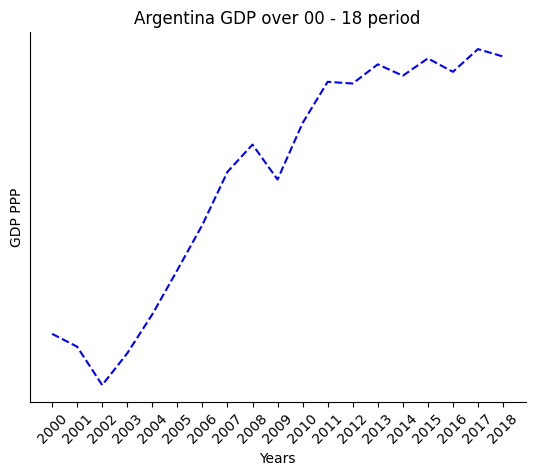

In [24]:
# First plot to check everything is in order

plt.figure()
plt.title('Argentina GDP over 00 - 18 period')
plt.ylabel('GDP PPP')
plt.xlabel('Years')
plt.plot(df['Argentina'], '--b')
for i in plt.gca().xaxis.get_ticklabels():
    i.set_rotation(45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([])

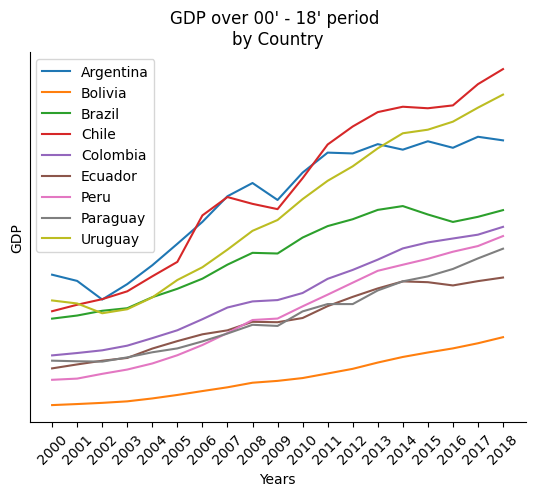

In [25]:
# Plot of the evolution of the GDP per country across the years (it is a bit confusing)
plt.figure()
for i in plt.gca().xaxis.get_ticklabels():
    i.set_rotation(45)
plt.yticks([])
plt.ylabel('GDP')
plt.xlabel('Years')
plt.title("GDP over 00' - 18' period \nby Country")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for i in df.columns:
    plt.plot(df[i], '-', label = i)
plt.legend()
plt.show()

In [26]:
# I created a widget to plot the evolution of GDP over the years for each country individually

@interact(colname = widgets.Dropdown(options = df.columns, value = df.columns[0], description = 'Countries'))
def plot(colname):
    plt.figure()
    plt.plot(df[colname], '-', label = colname)
    for i in plt.gca().xaxis.get_ticklabels():
        i.set_rotation(45)
    plt.ylim(0, 25222.53)      ##### Sets the same  y-scale for all plots
    plt.title('{} GDP over the 2000 - 2018 period'.format(colname))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

interactive(children=(Dropdown(description='Countries', options=('Argentina', 'Bolivia', 'Brazil', 'Chile', 'C…

In [27]:
## To find out what is the max value in the df, so I can set the same y-scale for all plots in the widget

maxlist = []
for i in df.columns:
    maxlist.append(max(df[i]))
max(maxlist)

25222.53

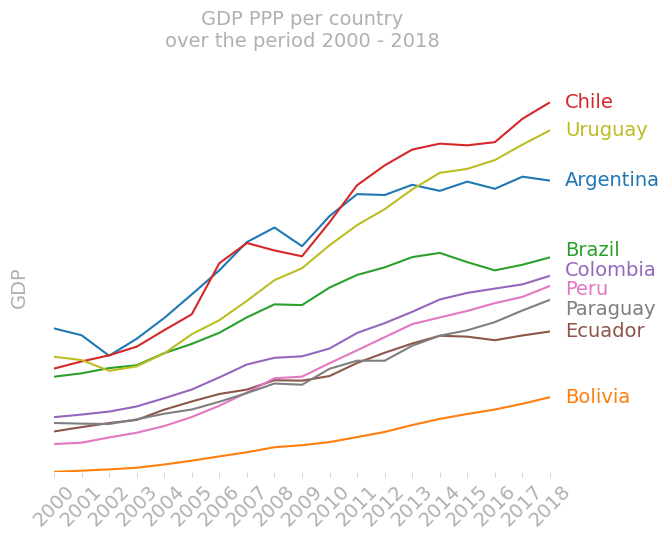

In [28]:
### THIS IS A NEW VERSION OF THE CHART (MORE STYLIZED USING MATPLOTX)
#Preparing the varibles and labels:
y = []
for i in df.columns:
    y.append(list(df[i]))

labels = [i for i in df.columns]


x = list(range(2000, 2019, 1))
with plt.style.context(matplotx.styles.dufte):
    for yy, label in zip(y, labels):
        plt.plot(x, yy, label = label)
    matplotx.line_labels()
    plt.xticks(x)
    for i in plt.gca().xaxis.get_ticklabels():
        i.set_rotation(45)
    plt.yticks([])
    plt.ylabel('GDP')
    plt.title('GDP PPP per country\nover the period 2000 - 2018')
    plt.show()

Author: Braian E. Sosa